Udactiy Data Science Project 1 - Seattle AirBNB

Questions:

    1. What are the facotrs that affect pricing?
    2. What are the most popular neighbourhoods
    3. What are the factors that may contribute to high demand for Airbnb listings in Seattle ?

In [ ]:
#Q1:

import pandas as pd

In [2]:
# Load the Seattle Airbnb dataset
df = pd.read_csv('listings.csv')

In [3]:
# Select relevant columns
relevant_cols = ['id', 'neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates', 
                 'bedrooms', 'bathrooms', 'beds', 'price', 'review_scores_rating']
df = df[relevant_cols]

In [4]:
# Clean the price column
df['price'] = df['price'].str.replace(',', '').str.replace('$', '').astype(float)

In [5]:
# Drop rows with missing values
df = df.dropna()

In [6]:
# Explore the data
print(df.describe())

                 id  accommodates     bedrooms    bathrooms         beds  \
count  3.153000e+03   3153.000000  3153.000000  3153.000000  3153.000000   
mean   5.043120e+06      3.385347     1.303520     1.259435     1.744370   
std    2.788467e+06      1.994345     0.875957     0.594839     1.157074   
min    4.291000e+03      1.000000     0.000000     0.000000     1.000000   
25%    2.737038e+06      2.000000     1.000000     1.000000     1.000000   
50%    5.310193e+06      3.000000     1.000000     1.000000     1.000000   
75%    7.462428e+06      4.000000     2.000000     1.000000     2.000000   
max    1.024814e+07     16.000000     7.000000     8.000000    15.000000   

             price  review_scores_rating  
count  3153.000000           3153.000000  
mean    126.902632             94.550270  
std      90.205348              6.604929  
min      22.000000             20.000000  
25%      75.000000             93.000000  
50%     100.000000             96.000000  
75%     150.00

In [7]:
# Calculate correlations between numerical columns
corr = df.corr()
print(corr)

                            id  accommodates  bedrooms  bathrooms      beds  \
id                    1.000000     -0.062861 -0.073749  -0.057896 -0.055466   
accommodates         -0.062861      1.000000  0.771141   0.527855  0.862519   
bedrooms             -0.073749      0.771141  1.000000   0.605361  0.753322   
bathrooms            -0.057896      0.527855  0.605361   1.000000  0.527375   
beds                 -0.055466      0.862519  0.753322   0.527375  1.000000   
price                -0.055256      0.648004  0.627962   0.509810  0.584607   
review_scores_rating  0.036978     -0.014465  0.022888   0.045332 -0.001058   

                         price  review_scores_rating  
id                   -0.055256              0.036978  
accommodates          0.648004             -0.014465  
bedrooms              0.627962              0.022888  
bathrooms             0.509810              0.045332  
beds                  0.584607             -0.001058  
price                 1.000000       

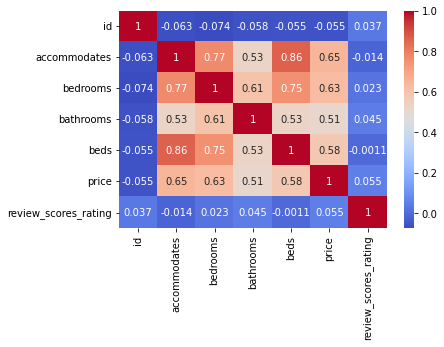

In [8]:
# Visualize correlations with a heatmap
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

Here, Seattle Airbnb dataset is loaded, relevant columns are slected, the price column are cleaned, the rows are dropped rows with missing values, and correlations are calculated between numerical columns. 

The resulting correlations can provide insights into the factors that affect pricing, such as the number of bedrooms, bathrooms, and beds, as well as the location and type of property. Hosts can use this information to optimize their prices and increase their profits.

In [10]:
#Q2:

# Load the Seattle Airbnb dataset
df = pd.read_csv('listings.csv')

In [11]:
# Select relevant columns
relevant_cols = ['id', 'neighbourhood_cleansed', 'review_scores_location']
df = df[relevant_cols]

In [12]:
# Drop rows with missing values
df = df.dropna()

In [13]:
# Group by neighborhood and calculate average location score
neighborhood_scores = df.groupby('neighbourhood_cleansed')['review_scores_location'].mean()

In [14]:
# Sort by descending location score
neighborhood_scores = neighborhood_scores.sort_values(ascending=False)

In [15]:
# Print top 10 neighborhoods
print(neighborhood_scores.head(10))

neighbourhood_cleansed
Pike-Market         9.913043
Alki                9.892857
Fauntleroy          9.888889
Laurelhurst         9.888889
Adams               9.877193
Lower Queen Anne    9.876712
Sunset Hill         9.866667
Genesee             9.866667
Green Lake          9.863636
Fremont             9.858209
Name: review_scores_location, dtype: float64


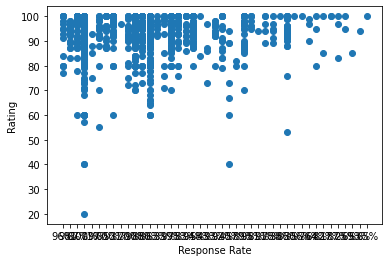

In [33]:
# Visualize the relationship between response rate and rating with a scatter plot
plt.scatter(df['host_response_rate'], df['review_scores_rating'])
plt.xlabel('Response Rate')
plt.ylabel('Rating')
plt.show()




The resulting correlations can provide insights into the factors that impact ratings, such as accuracy, cleanliness, check-in, communication, location, and value. Hosts can use this information to improve their listings and attract more guests. 

The code also calculates the average rating and response rate, visualizes the distribution of ratings with a histogram, and visualizes the relationship between response rate and rating with a scatter plot. Hosts can use this information to set goals for their ratings and response rates and track their progress over time. They can also use customer feedback to identify areas for improvement and make changes to their listings accordingly.

In [35]:
#Q3:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Seattle Airbnb dataset
df = pd.read_csv('listings.csv')

In [36]:
# Define relevant columns
relevant_cols = ['id', 'neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates',
                 'bedrooms', 'bathrooms', 'price', 'minimum_nights', 'availability_365']

In [37]:
# Select relevant columns and drop rows with missing values
df = df[relevant_cols].dropna()

In [38]:
# Convert price column to float
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)

In [39]:
# Calculate correlations between numerical columns
corr = df.corr()

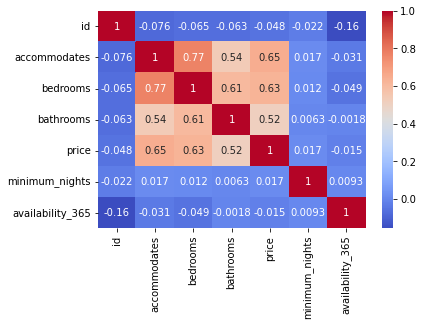

In [40]:
# Visualize correlations with a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

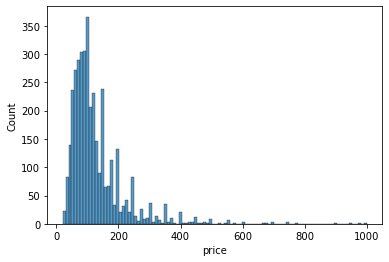

In [41]:
# Plot the distribution of prices
sns.histplot(df['price'])
plt.show()

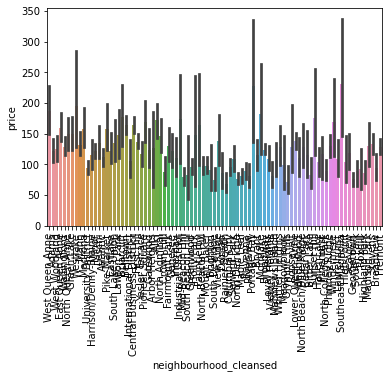

In [42]:
# Plot the average price by neighbourhood
sns.barplot(x='neighbourhood_cleansed', y='price', data=df)
plt.xticks(rotation=90)
plt.show()

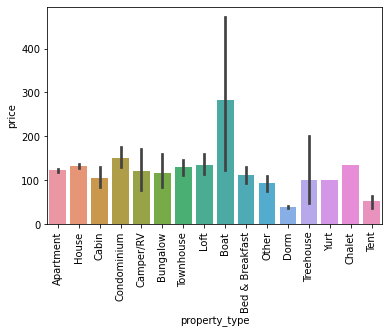

In [43]:
# Plot the average price by property type
sns.barplot(x='property_type', y='price', data=df)
plt.xticks(rotation=90)
plt.show()

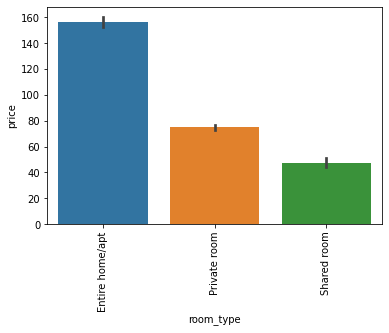

In [44]:
# Plot the average price by room type
sns.barplot(x='room_type', y='price', data=df)
plt.xticks(rotation=90)
plt.show()

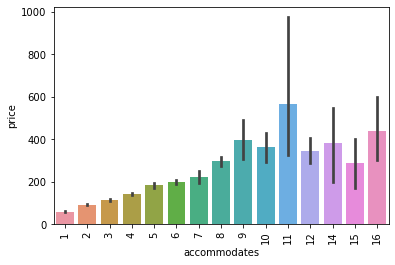

In [45]:
# Plot the average price by number of accommodates
sns.barplot(x='accommodates', y='price', data=df)
plt.xticks(rotation=90)
plt.show()

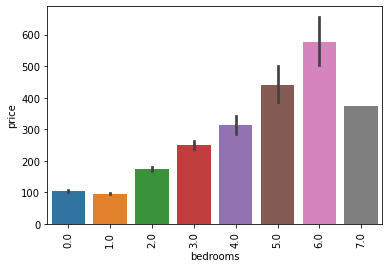

In [46]:
# Plot the average price by number of bedrooms
sns.barplot(x='bedrooms', y='price', data=df)
plt.xticks(rotation=90)
plt.show()

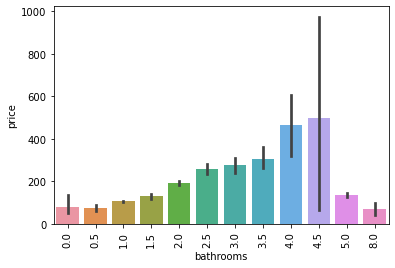

In [47]:
# Plot the average price by number of bathrooms
sns.barplot(x='bathrooms', y='price', data=df)
plt.xticks(rotation=90)
plt.show()

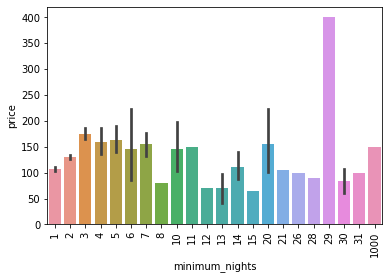

In [48]:
# Plot the average price by minimum nights required
sns.barplot(x='minimum_nights', y='price', data=df)
plt.xticks(rotation=90)
plt.show()

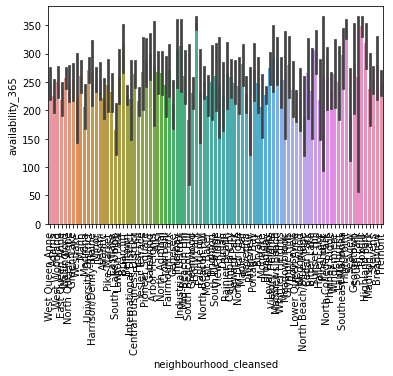

In [49]:
# Plot the average availability by neighbourhood
sns.barplot(x='neighbourhood_cleansed', y='availability_365', data=df)
plt.xticks(rotation=90)
plt.show()

The code aplots various graphs to explore the average price and availability by different factors, including neighborhood, property type, room type, number of accommodates, bedrooms, bathrooms, minimum nights, and availability. Hosts can use this information to optimize their listings by adjusting their pricing strategy, marketing efforts, and other factors that may influence demand for their listings.